<a href="https://colab.research.google.com/github/amber-bajaj-1/Ramsey_Code/blob/main/Ramsey_Code_Multicolour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Definitions and Visual Specifications

In [1]:
!pip install gravis
import gravis as gv
import matplotlib.pyplot as plt
import networkx as nx
import random
import math
import itertools as it
from numpy.random import permutation as rand_perm
from time import time as t

# CONSTANTS (GRAPH VISUALIZATION)
H_NODE_SIZE  = 40
N_NODE_SIZE  = 5
H_EDGE_WIDTH = 30
N_EDGE_WIDTH = 5
DENSITY_THRESHOLD = 90

# COLORINGS
def Random_edge_colors(H): # Returns a random 2-colored H.
    G = H.copy()
    for u,v in G.edges():
        if bool(random.getrandbits(1)):
            G[u][v]['color'] = 'red'
        else:
            G[u][v]['color'] = 'blue'
    return G

def Random_edge_3_colors(H): # Returns a random 3-colored H.
    G = H.copy()
    for u,v in G.edges():
        colorChoice = random.randint(1,3) #1 = red, 2 = blue, 3 = green
        if colorChoice == 1:
            G[u][v]['color'] = 'red'
        elif colorChoice == 2:
            G[u][v]['color'] = 'blue'
        else:
            G[u][v]['color'] = 'green'
    return G

def Random_edge_4_colors(H): # Returns a random 4-colored H.
    G = H.copy()
    for u,v in G.edges():
        colorChoice = random.randint(1,4) #1 = red, 2 = blue, 3 = green, 4 = purple
        if colorChoice == 1:
            G[u][v]['color'] = 'red'
        elif colorChoice == 2:
            G[u][v]['color'] = 'blue'
        elif colorChoice == 3:
            G[u][v]['color'] = 'green'
        else:
            G[u][v]['color'] = 'purple'
    return G

nums_to_colors = {1:'red',2:'blue',3:'green',4:'purple',5:'orange',6:'brown',7:'pink',8:'gray',
        9:'black',10:'olive',11:'cyan',12:'midnightblue',13:'magenta',14:'yellow',15:'turquoise'}

def Random_edge_n_colors(H,n): # Returns a random n-colored H, for 0 < n <= 15
    G = H.copy()
    for u,v in G.edges():
        colorChoice = random.randint(1,n) #color values given by "colors" dictionary
        G[u][v]['color'] = nums_to_colors[colorChoice]
    return G

def Extremal_edge_colors(H,r=1): # Returns a random 2-colored H with r red edges.
    G = H.copy()
    count = 0
    nodes = rand_perm(len(H.nodes()))
    for u,v in [(u,v) for u,v in it.product(nodes,repeat=2) if u<v]:
        G[u][v]['color'] = 'blue'
        if bool(random.getrandbits(1)) and count != r:
            G[u][v]['color'] = 'red'
            count += 1
    if count < r:
        print("Not enough red edges!")
        raise ValueError
    return G

def Extremal_edge_colors2(H,r=1): # Returns a random 2-colored H with mostly separated r red edges.
    G = H.copy()
    count = 0
    nodes = rand_perm(len(H.nodes()))
    n = len(nodes)
    for i in range(n):
        for j in range(i,n):
            G[i][(i+j)%n]['color'] = 'blue'
            if bool(random.getrandbits(1)) and count != r:
                G[i][(i+j)%n]['color'] = 'red'
                count += 1
    return G

def Star_edge_colors(H,center=0): # Returns a 2-colored H with a red star.
    G = H.copy()
    n = len(G.nodes())
    for u,v in G.edges():
        if center in [u,v]:
            G[u][v]['color'] = 'red'
        else:
            G[u][v]['color'] = 'blue'
    return G

def Monochr_edge_colors(H,color='blue'):
  G = H.copy()
  n = len(G.nodes())
  for u,v in G.edges():
      G[u][v]['color'] = color
  return G

def Coloring(H,type='random',**kwargs):
    color_dic_type = {
    'random':Random_edge_colors,
    'random3':Random_edge_3_colors,
    'random4':Random_edge_4_colors,
    'extremal':Extremal_edge_colors,
    'extremal_s':Extremal_edge_colors2,
    'star':Star_edge_colors,
    'monochromatic':Monochr_edge_colors
    }
    return color_dic_type[type](H,**kwargs)

# AUXILIARY FUNCTIONS
def isMonochromatic(G,v): # Decides whether all edges that contain v are the same color.
    color_set = set([G[v][u]['color'] for u in G.neighbors(v)])
    if len(color_set) == 1:
        return True
    else:
        return False

def Highlight(G,edges=None): # Highlights a list of edges vertices.
    if edges == None:
        edges = []
    H = G.copy()
    n = len(H.nodes())
    for u,v in H.edges():
        if n > DENSITY_THRESHOLD:
            H[u][v]['weight'] = 0
        else:
            H[u][v]['weight'] = N_EDGE_WIDTH
    for u,v in edges:
        if n > DENSITY_THRESHOLD:
            H[u][v]['weight'] = N_EDGE_WIDTH*G.number_of_nodes()
        else:
            H[u][v]['weight'] = H_EDGE_WIDTH
    return H

def QuickDraw(G,highlight=None,labels=False): # Draws a highlighted circular graph with all specified attributes.
    if highlight == None:
        highlight = []
    G = Highlight(G,edges=highlight)

    h_node_size = (1 - int(labels))*H_NODE_SIZE
    n_node_size = (1 - int(labels))*N_NODE_SIZE

    nodes   = G.nodes()
    edges   = G.edges()
    colors  = [G[u][v]['color'] for u,v in edges]
    widths  = [G[u][v]['weight']/(G.number_of_nodes()^2) for u,v in edges]
    sizes   = []
    for vertex in nodes:
        weights_v = [G[u][v]['weight'] for u,v in G.edges(vertex)]
        if H_EDGE_WIDTH in weights_v:
            sizes.append(h_node_size)
        else:
            sizes.append(n_node_size)

    options = {'node_color': 'black'}
    nx.draw_circular(G,**options,
                     #nodes       = nodes,
                     #edges       = edges,
                     width       = widths,
                     node_size   = sizes,
                     edge_color  = colors,
                     with_labels = labels,
                     font_weight = 'bold',
                     font_size   = 15)
    plt.show()

def FindTwoEdges(G,color): # Returns the nodes of two edges of the given color.
    count = 0
    for u,v in G.edges():
        if G[u][v]['color'] == color:
            if count == 0:
                u0, v0 = (u,v)
                count += 1
            else:
                return u0,v0,u,v
    print("Can't find two edges!")
    raise ValueError

def FindOneEdge(G,color): # Returns the nodes of one edge of the given color.
    for u,v in G.edges():
        if G[u][v]['color'] == color:
            return u,v
    print("\nCan't find a "+color+" edge!")
    raise ValueError

def NotColor(color): # Inverts colors between blue and red.
    if color == 'red':
        return 'blue'
    else:
        return 'red'

def _balP(m): # Calculates the bal number of P_m.
    if m == 3:
        return 0
    else:
        s = m
        k = m - 1
        bal = balP(m - 2)
        return int(max(bal,(s - 3)*(s + k - 4)/2))

def balP(m): # Same as above but dynamically.
    bal =[]
    for i in range(3,m+1):
        if i == 3:
            bal.append(0)
        else:
            s = i
            k = i - 1
            newbal = int(max(bal[-1],(s - 3)*(s + k - 4)/2))
            bal.append(newbal)
    return bal[-1]

def ColoredEdges(G,v,color): # Returns the set of neighbors of v with a given color.
    c_neigh = []
    for u in G.neighbors(v):
        if G[u][v]['color'] == color:
            c_neigh.append(u)
    return c_neigh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.1/659.1 kB 8.7 MB/s eta 0:00:00


# Multicolor Ramsey Theory for Monochromatic Triangles

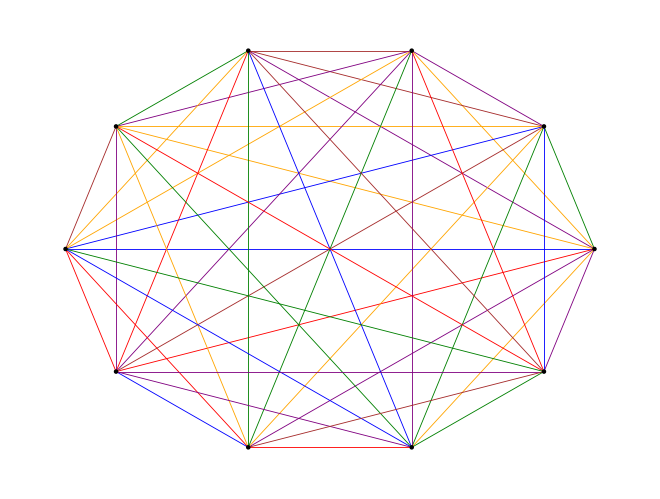

In [7]:
# Visualizes a complete graph colouring with multiple different colours
H = nx.complete_graph(10)
G = Random_edge_n_colors(H,6)
QuickDraw(G, highlight=None, labels=False)

In [8]:
# Defines a bound given in a 2019 paper by Eliahou
def Ramsey_triangle_bound(n): # where n is the number of colours
  if n == 1: return 3
  elif n == 2: return 6
  elif n == 3: return 17
  else: return math.floor(math.factorial(n)*(math.e-(5/8))+1)

In [13]:
Ramsey_triangle_bound(4)

51

In [10]:
color_to_num = {'red':1,'blue':2,'green':3,'purple':4,'orange':5,'brown':6,'pink':7,'gray':8,
        'black':9,'olive':10,'cyan':11,'midnightblue':12,'magenta':13,'yellow':14,'turquoise':15}

# Finds a monochromatic triangle given a complete graph H, colored in n colors
def triangle_complete(H,n):
  #ensures there are enough verticies to find a monochromatic triangle
  if H.number_of_nodes() < Ramsey_triangle_bound(n):
    raise ValueError("Possibly not enough vertices!")

  #creates a 2D array, with each index representing edges of color i+1
  allColorEdges = []
  for i in range (0,n):
    allColorEdges.append([])

  for x,y in H.edges:
    index = color_to_num[H[x][y]['color']] - 1
    allColorEdges[index].append(((x,y)))

  #creates a list of all monochromatic triangles
  threeSets = []
  for i in range (0,n):
    threeSets.append([])

  for i in range (0, n):
    for x,y in allColorEdges[i]:
      for w,z in allColorEdges[i]:
        if y == w and H[x][z]['color'] == nums_to_colors[i+1]:
          threeSets[i].append((x,y,z))

  #chooses a random triangle from threeSets to highlight
  rand_color = random.randint(0,n-1)
  a,b,c = threeSets[rand_color][random.randint(0, len(threeSets[rand_color])-1)]
  triangle = [(a,b),(b,c),(c,a)]
  return triangle

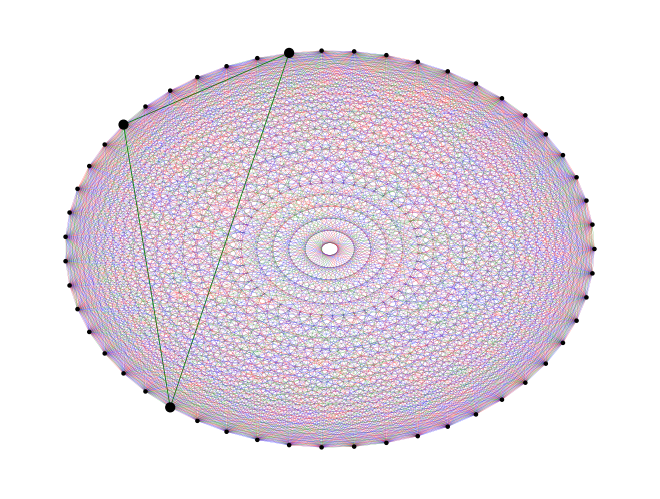

In [14]:
H = nx.complete_graph(51)
G = Random_edge_n_colors(H,4)
triangle = triangle_complete(G,4)

QuickDraw(G, highlight=triangle, labels=False)

In [15]:
# With 3D visualization method
H = nx.complete_graph(51)
H = Random_edge_n_colors(H,4)
triangle = triangle_complete(H,4)

options = {'show_node_label':False,'edge_size_data_source':'weight','use_edge_size_normalization':True,'edge_curvature':0.1}
gv.d3(Highlight(H,edges=triangle),**options)